In [ ]:
pip install astroNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.1 MB/s eta 0:00:00


In [ ]:
import ssl
import requests

ssl._create_default_https_context = ssl._create_unverified_context
response = requests.get("https://www.astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5",verify=False)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.astro.utoronto.ca'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10CNN
from astroNN.datasets import load_galaxy10sdss
from astroNN.datasets.galaxy10sdss import galaxy10cls_lookup, galaxy10_confusion

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import argparse
import cv2
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
images, labels = load_galaxy10sdss()

Galaxy10.h5:  99%|█████████▉| 208M/210M [00:15<00:00, 15.7MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:16, 12.9MB/s]                           


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=0, stratify=labels)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=0, stratify=y_test)

In [ ]:
train_freqs = [0,0,0,0,0,0,0,0,0,0]
counter = 0

for current_label in y_train:
  train_freqs[current_label] = train_freqs[current_label] + 1

In [ ]:
train_freqs

[2423, 4898, 4404, 244, 1074, 12, 412, 785, 634, 363]

In [ ]:
test_freqs = [0,0,0,0,0,0,0,0,0,0]
counter = 0

for current_label in y_test:
  test_freqs[current_label] = test_freqs[current_label] + 1

In [ ]:
test_freqs

[519, 1049, 944, 52, 230, 3, 89, 168, 136, 78]

In [ ]:
val_freqs = [0,0,0,0,0,0,0,0,0,0]
counter = 0

for current_label in y_val:
  val_freqs[current_label] = val_freqs[current_label] + 1

In [ ]:
val_freqs

[519, 1050, 944, 53, 230, 2, 88, 168, 136, 78]

Data Augmentation on Train

In [ ]:
class5Images = []

for i in range(len(X_train)):
  if(y_train[i] == 5):
    class5Images.append(X_train[i])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        # width_shift_range=0.2, height_shift_range=0.2)

# aug_iter = datagen.flow(class5Images, batch_size=1)

generated_images = []
for i in range(len(class5Images)):
  original_image = class5Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(30):
    image = next(aug_iter)[0].astype('uint8')
    generated_images.append(image)

In [ ]:
class3Images = []

for i in range(len(X_train)):
  if(y_train[i] == 3):
    class3Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class3_images = []
for i in range(len(class3Images)):
  original_image = class3Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class3_images.append(image)

In [ ]:
class6Images = []

for i in range(len(X_train)):
  if(y_train[i] == 6):
    class6Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class6_images = []
for i in range(len(class6Images)):
  original_image = class6Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class6_images.append(image)

In [ ]:
class9Images = []

for i in range(len(X_train)):
  if(y_train[i] == 9):
    class9Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class9_images = []
for i in range(len(class9Images)):
  original_image = class9Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class9_images.append(image)

In [ ]:
class8Images = []

for i in range(len(X_train)):
  if(y_train[i] == 8):
    class8Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class8_images = []
for i in range(len(class8Images)):
  original_image = class8Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class8_images.append(image)

In [ ]:
class4Images = []

for i in range(len(X_train)):
  if(y_train[i] == 4):
    class4Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class4_images = []
for i in range(len(class4Images)):
  original_image = class4Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class4_images.append(image)

In [ ]:
class0Images = []

for i in range(len(X_train)):
  if(y_train[i] == 0):
    class0Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class0_images = []
for i in range(len(class0Images)):
  original_image = class0Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class0_images.append(image)

In [ ]:
class7Images = []

for i in range(len(X_train)):
  if(y_train[i] == 7):
    class7Images.append(X_train[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class7_images = []
for i in range(len(class7Images)):
  original_image = class7Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class7_images.append(image)

In [ ]:
updated_train_images = np.concatenate((X_train, generated_images, generated_class3_images, generated_class6_images, generated_class9_images, generated_class8_images, generated_class7_images, generated_class0_images, generated_class4_images), axis=0)

In [ ]:
new_train_labels = []

for i in range(len(generated_images)):
  new_train_labels.append(5)

for i in range(len(generated_class3_images)):
  new_train_labels.append(3)

for i in range(len(generated_class6_images)):
  new_train_labels.append(6)

for i in range(len(generated_class9_images)):
  new_train_labels.append(9)

for i in range(len(generated_class8_images)):
  new_train_labels.append(8)

for i in range(len(generated_class7_images)):
  new_train_labels.append(7)

for i in range(len(generated_class0_images)):
  new_train_labels.append(0)

for i in range(len(generated_class4_images)):
  new_train_labels.append(4)

In [ ]:
y_train = np.append(y_train, new_train_labels)

In [ ]:
X_train = updated_train_images
X_train.shape

(29209, 69, 69, 3)

In [ ]:
y_train.shape

(29209,)

In [ ]:
resized_images = []
for image in X_train:
    resized_image = cv2.resize(image, (75, 75))
    resized_images.append(resized_image)
X_train_resized = resized_images

In [ ]:
X_train_resized[0].shape

(75, 75, 3)

Data Augmentation on Val

In [ ]:
class5Images = []

for i in range(len(X_val)):
  if(y_val[i] == 5):
    class5Images.append(X_val[i])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        # width_shift_range=0.2, height_shift_range=0.2)

# aug_iter = datagen.flow(class5Images, batch_size=1)

generated_images = []
for i in range(len(class5Images)):
  original_image = class5Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(30):
    image = next(aug_iter)[0].astype('uint8')
    generated_images.append(image)

In [ ]:
class3Images = []

for i in range(len(X_val)):
  if(y_val[i] == 3):
    class3Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class3_images = []
for i in range(len(class3Images)):
  original_image = class3Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class3_images.append(image)

In [ ]:
class6Images = []

for i in range(len(X_val)):
  if(y_val[i] == 6):
    class6Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class6_images = []
for i in range(len(class6Images)):
  original_image = class6Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class6_images.append(image)

In [ ]:
class9Images = []

for i in range(len(X_val)):
  if(y_val[i] == 9):
    class9Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class9_images = []
for i in range(len(class9Images)):
  original_image = class9Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class9_images.append(image)

In [ ]:
class8Images = []

for i in range(len(X_val)):
  if(y_val[i] == 8):
    class8Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class8_images = []
for i in range(len(class8Images)):
  original_image = class8Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class8_images.append(image)

In [ ]:
class4Images = []

for i in range(len(X_val)):
  if(y_val[i] == 4):
    class4Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class4_images = []
for i in range(len(class4Images)):
  original_image = class4Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class4_images.append(image)

In [ ]:
class0Images = []

for i in range(len(X_val)):
  if(y_val[i] == 0):
    class0Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class0_images = []
for i in range(len(class0Images)):
  original_image = class0Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class0_images.append(image)

In [ ]:
class7Images = []

for i in range(len(X_val)):
  if(y_val[i] == 7):
    class7Images.append(X_val[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class7_images = []
for i in range(len(class7Images)):
  original_image = class7Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class7_images.append(image)

In [ ]:
updated_val_images = np.concatenate((X_val, generated_images, generated_class3_images, generated_class6_images, generated_class9_images, generated_class8_images, generated_class7_images, generated_class0_images, generated_class4_images), axis=0)

In [ ]:
new_val_labels = []

for i in range(len(generated_images)):
  new_val_labels.append(5)

for i in range(len(generated_class3_images)):
  new_val_labels.append(3)

for i in range(len(generated_class6_images)):
  new_val_labels.append(6)

for i in range(len(generated_class9_images)):
  new_val_labels.append(9)

for i in range(len(generated_class8_images)):
  new_val_labels.append(8)

for i in range(len(generated_class7_images)):
  new_val_labels.append(7)

for i in range(len(generated_class0_images)):
  new_val_labels.append(0)

for i in range(len(generated_class4_images)):
  new_val_labels.append(4)

In [ ]:
y_val = np.append(y_val, new_val_labels)

In [ ]:
X_val = updated_val_images
X_val.shape

(6243, 69, 69, 3)

In [ ]:
y_val.shape

(6243,)

In [ ]:
resized_images = []
for image in X_val:
    resized_image = cv2.resize(image, (75, 75))
    resized_images.append(resized_image)
X_val_resized = resized_images

In [ ]:
X_val_resized[0].shape

(75, 75, 3)

Data Augmentation in Test

In [ ]:
class5Images = []

for i in range(len(X_test)):
  if(y_test[i] == 5):
    class5Images.append(X_test[i])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        # width_shift_range=0.2, height_shift_range=0.2)

# aug_iter = datagen.flow(class5Images, batch_size=1)

generated_images = []
for i in range(len(class5Images)):
  original_image = class5Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(30):
    image = next(aug_iter)[0].astype('uint8')
    generated_images.append(image)

In [ ]:
class3Images = []

for i in range(len(X_test)):
  if(y_test[i] == 3):
    class3Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class3_images = []
for i in range(len(class3Images)):
  original_image = class3Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class3_images.append(image)

In [ ]:
class6Images = []

for i in range(len(X_test)):
  if(y_test[i] == 6):
    class6Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class6_images = []
for i in range(len(class6Images)):
  original_image = class6Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class6_images.append(image)

In [ ]:
class9Images = []

for i in range(len(X_test)):
  if(y_test[i] == 9):
    class9Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class9_images = []
for i in range(len(class9Images)):
  original_image = class9Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class9_images.append(image)

In [ ]:
class8Images = []

for i in range(len(X_test)):
  if(y_test[i] == 8):
    class8Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class8_images = []
for i in range(len(class8Images)):
  original_image = class8Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class8_images.append(image)

In [ ]:
class4Images = []

for i in range(len(X_test)):
  if(y_test[i] == 4):
    class4Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class4_images = []
for i in range(len(class4Images)):
  original_image = class4Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(3):
    image = next(aug_iter)[0].astype('uint8')
    generated_class4_images.append(image)

In [ ]:
class0Images = []

for i in range(len(X_test)):
  if(y_test[i] == 0):
    class0Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class0_images = []
for i in range(len(class0Images)):
  original_image = class0Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class0_images.append(image)

In [ ]:
class7Images = []

for i in range(len(X_test)):
  if(y_test[i] == 7):
    class7Images.append(X_test[i])

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=60,
        fill_mode="nearest",
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.2])
        #width_shift_range=0.2, height_shift_range=0.2)

generated_class7_images = []
for i in range(len(class7Images)):
  original_image = class7Images[i]
  input_data = original_image.reshape(-1, 69, 69, 3)
  aug_iter = datagen.flow(input_data, batch_size=1)

  for i1 in range(2):
    image = next(aug_iter)[0].astype('uint8')
    generated_class7_images.append(image)

In [ ]:
updated_test_images = np.concatenate((X_test, generated_images, generated_class3_images, generated_class6_images, generated_class9_images, generated_class8_images, generated_class7_images, generated_class0_images, generated_class4_images), axis=0)

In [ ]:
new_test_labels = []

for i in range(len(generated_images)):
  new_test_labels.append(5)

for i in range(len(generated_class3_images)):
  new_test_labels.append(3)

for i in range(len(generated_class6_images)):
  new_test_labels.append(6)

for i in range(len(generated_class9_images)):
  new_test_labels.append(9)

for i in range(len(generated_class8_images)):
  new_test_labels.append(8)

for i in range(len(generated_class7_images)):
  new_test_labels.append(7)

for i in range(len(generated_class0_images)):
  new_test_labels.append(0)

for i in range(len(generated_class4_images)):
  new_test_labels.append(4)

In [ ]:
y_test = np.append(y_test, new_test_labels)

In [ ]:
X_test = updated_test_images
X_test.shape

(6273, 69, 69, 3)

In [ ]:
y_test.shape

(6273,)

In [ ]:
resized_images = []
for image in X_test:
    resized_image = cv2.resize(image, (75, 75))
    resized_images.append(resized_image)
X_test_resized = resized_images

In [ ]:
X_test_resized[0].shape

(75, 75, 3)

Range scaling and Target matrix creation

In [ ]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)
X_val_resized = np.array(X_val_resized)

In [ ]:
y_train = y_train.astype(np.float32)
y_train = to_categorical(y_train)
X_train = X_train.astype(np.float32)
X_train = X_train/255
X_train_resized = X_train_resized.astype(np.float32)
X_train_resized = X_train_resized/255

In [ ]:
y_test = y_test.astype(np.float32)
y_test = to_categorical(y_test)
X_test = X_test.astype(np.float32)
X_test = X_test/255
X_test_resized = X_test_resized.astype(np.float32)
X_test_resized = X_test_resized/255

In [ ]:
y_val = y_val.astype(np.float32)
y_val = to_categorical(y_val)
X_val = X_val.astype(np.float32)
X_val = X_val/255
X_val_resized = X_val_resized.astype(np.float32)
X_val_resized = X_val_resized/255

Conerting images to grayscale and applying morphology opening

In [ ]:
pre_processed_images = []

for i in range(len(X_train)):
  gray = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_train = np.array(pre_processed_images)

In [ ]:
X_train.shape

(29209, 69, 69, 3)

In [ ]:
y_train.shape

(29209, 10)

In [ ]:
pre_processed_images = []

for i in range(len(X_test)):
  gray = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_test = np.array(pre_processed_images)

In [ ]:
X_test.shape

(6273, 69, 69, 3)

In [ ]:
y_test.shape

(6273, 10)

In [ ]:
pre_processed_images = []

for i in range(len(X_val)):
  gray = cv2.cvtColor(X_val[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_val = np.array(pre_processed_images)

In [ ]:
X_val.shape

(6243, 69, 69, 3)

In [ ]:
y_val.shape

(6243, 10)

In [ ]:
pre_processed_images = []

for i in range(len(X_train_resized)):
  gray = cv2.cvtColor(X_train_resized[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_train_resized = np.array(pre_processed_images)

In [ ]:
X_train_resized.shape

(29209, 75, 75, 3)

In [ ]:
pre_processed_images = []

for i in range(len(X_test_resized)):
  gray = cv2.cvtColor(X_test_resized[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_test_resized = np.array(pre_processed_images)

In [ ]:
X_test_resized.shape

(6273, 75, 75, 3)

In [ ]:
pre_processed_images = []

for i in range(len(X_val_resized)):
  gray = cv2.cvtColor(X_val_resized[i], cv2.COLOR_RGB2GRAY)
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
  noise_removed_img = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  pre_processed_images.append(cv2.cvtColor(noise_removed_img, cv2.COLOR_GRAY2RGB))

In [ ]:
X_val_resized = np.array(pre_processed_images)

In [ ]:
X_val_resized.shape

(6243, 75, 75, 3)

Compute class weights for model training

In [ ]:
y_train.shape

(29209, 10)

In [ ]:
y_train_labels=[]

for labels in y_train:
  for i in range(10):
    if(labels[i] == 0):
      y_train_labels.append(i)

In [ ]:
np.unique(y_train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train_labels),
                                        y = y_train_labels                                                    
                                    )
class_weights = dict(zip(np.unique(y_train_labels), class_weights))
class_weights

{0: 1.1981814038286236,
 1: 1.0813253259841225,
 2: 1.0597903648457971,
 3: 0.9311125278928913,
 4: 1.055196082366636,
 5: 0.9116100842667406,
 6: 0.9538151736148907,
 7: 0.9789267893051314,
 8: 0.9626872230563591,
 9: 0.9348541963015647}

Variables to store performance of each model

In [ ]:
training_accuracies=[]
validation_accuracies=[]
training_loss=[]
validation_loss=[]

VGG16

In [ ]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg16 = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(69,69,3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Freeze four convolution blocks
for layer in vgg16.layers[:4]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg16.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [ ]:
x = vgg16.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
# x = Dense(32, activation='relu')(x)
# x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg16.input, outputs=x)

In [ ]:
import functools
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'

In [ ]:
top2_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=2)

top2_acc.__name__ = 'top2_acc'

In [ ]:
top4_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=4)

top4_acc.__name__ = 'top4_acc'

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=5e-5), metrics=["accuracy", top2_acc, top3_acc, top4_acc, "top_k_categorical_accuracy"])
history = transfer_model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), callbacks=[lr_reduce,checkpoint], class_weight=class_weights)

Epoch 1/20
913/913 [==============================] - ETA: 0s - loss: 0.8654 - accuracy: 0.6852 - top2_acc: 0.8835 - top3_acc: 0.9615 - top4_acc: 0.9824 - top_k_categorical_accuracy: 0.9905
Epoch 1: val_accuracy improved from -inf to 0.75028, saving model to vgg16_finetune.h15


913/913 [==============================] - 38s 26ms/step - loss: 0.8654 - accuracy: 0.6852 - top2_acc: 0.8835 - top3_acc: 0.9615 - top4_acc: 0.9824 - top_k_categorical_accuracy: 0.9905 - val_loss: 0.6577 - val_accuracy: 0.7503 - val_top2_acc: 0.9273 - val_top3_acc: 0.9837 - val_top4_acc: 0.9939 - val_top_k_categorical_accuracy: 0.9978 - lr: 5.0000e-05
Epoch 2/20
913/913 [==============================] - ETA: 0s - loss: 0.5863 - accuracy: 0.7897 - top2_acc: 0.9460 - top3_acc: 0.9873 - top4_acc: 0.9964 - top_k_categorical_accuracy: 0.9988
Epoch 2: val_accuracy improved from 0.75028 to 0.78760, saving model to vgg16_finetune.h15


913/913 [==============================] - 21s 23ms/step - loss: 0.5863 - accuracy: 0.7897 - top2_acc: 0.9460 - top3_acc: 0.9873 - top4_acc: 0.9964 - top_k_categorical_accuracy: 0.9988 - val_loss: 0.5669 - val_accuracy: 0.7876 - val_top2_acc: 0.9407 - val_top3_acc: 0.9875 - val_top4_acc: 0.9963 - val_top_k_categorical_accuracy: 0.9981 - lr: 5.0000e-05
Epoch 3/20
913/913 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.8260 - top2_acc: 0.9600 - top3_acc: 0.9917 - top4_acc: 0.9982 - top_k_categorical_accuracy: 0.9993
Epoch 3: val_accuracy did not improve from 0.78760
913/913 [==============================] - 19s 21ms/step - loss: 0.4857 - accuracy: 0.8260 - top2_acc: 0.9600 - top3_acc: 0.9917 - top4_acc: 0.9982 - top_k_categorical_accuracy: 0.9993 - val_loss: 0.6307 - val_accuracy: 0.7658 - val_top2_acc: 0.9425 - val_top3_acc: 0.9873 - val_top4_acc: 0.9957 - val_top_k_categorical_accuracy: 0.9976 - lr: 5.0000e-05
Epoch 4/20
913/913 [==============================]

913/913 [==============================] - 22s 24ms/step - loss: 0.4273 - accuracy: 0.8478 - top2_acc: 0.9680 - top3_acc: 0.9940 - top4_acc: 0.9988 - top_k_categorical_accuracy: 0.9996 - val_loss: 0.5626 - val_accuracy: 0.7932 - val_top2_acc: 0.9438 - val_top3_acc: 0.9865 - val_top4_acc: 0.9947 - val_top_k_categorical_accuracy: 0.9978 - lr: 5.0000e-05
Epoch 5/20
913/913 [==============================] - ETA: 0s - loss: 0.3755 - accuracy: 0.8669 - top2_acc: 0.9768 - top3_acc: 0.9954 - top4_acc: 0.9988 - top_k_categorical_accuracy: 0.9996
Epoch 5: val_accuracy improved from 0.79321 to 0.82749, saving model to vgg16_finetune.h15


913/913 [==============================] - 21s 23ms/step - loss: 0.3755 - accuracy: 0.8669 - top2_acc: 0.9768 - top3_acc: 0.9954 - top4_acc: 0.9988 - top_k_categorical_accuracy: 0.9996 - val_loss: 0.4957 - val_accuracy: 0.8275 - val_top2_acc: 0.9611 - val_top3_acc: 0.9907 - val_top4_acc: 0.9971 - val_top_k_categorical_accuracy: 0.9982 - lr: 5.0000e-05
Epoch 6/20
913/913 [==============================] - ETA: 0s - loss: 0.3265 - accuracy: 0.8838 - top2_acc: 0.9819 - top3_acc: 0.9972 - top4_acc: 0.9994 - top_k_categorical_accuracy: 0.9999
Epoch 6: val_accuracy did not improve from 0.82749
913/913 [==============================] - 19s 21ms/step - loss: 0.3265 - accuracy: 0.8838 - top2_acc: 0.9819 - top3_acc: 0.9972 - top4_acc: 0.9994 - top_k_categorical_accuracy: 0.9999 - val_loss: 0.5836 - val_accuracy: 0.7969 - val_top2_acc: 0.9483 - val_top3_acc: 0.9843 - val_top4_acc: 0.9957 - val_top_k_categorical_accuracy: 0.9981 - lr: 5.0000e-05
Epoch 7/20
913/913 [==============================]

913/913 [==============================] - 21s 23ms/step - loss: 0.0543 - accuracy: 0.9821 - top2_acc: 0.9993 - top3_acc: 0.9999 - top4_acc: 0.9999 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7986 - val_accuracy: 0.8292 - val_top2_acc: 0.9547 - val_top3_acc: 0.9853 - val_top4_acc: 0.9946 - val_top_k_categorical_accuracy: 0.9979 - lr: 5.0000e-05


In [ ]:
transfer_model.evaluate(X_test, y_test)[1]

197/197 [==============================] - 2s 9ms/step - loss: 0.7908 - accuracy: 0.8310 - top2_acc: 0.9563 - top3_acc: 0.9874 - top4_acc: 0.9944 - top_k_categorical_accuracy: 0.9981


0.8310218453407288

In [ ]:
print(X_train.shape)

(29209, 69, 69, 3)


In [ ]:
y_pred = transfer_model.predict(X_test)

197/197 [==============================] - 1s 6ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

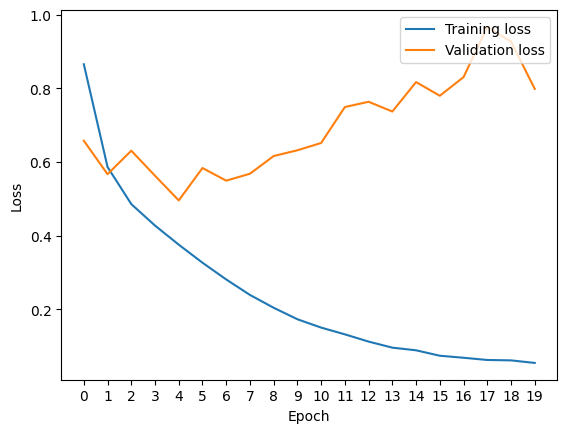

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

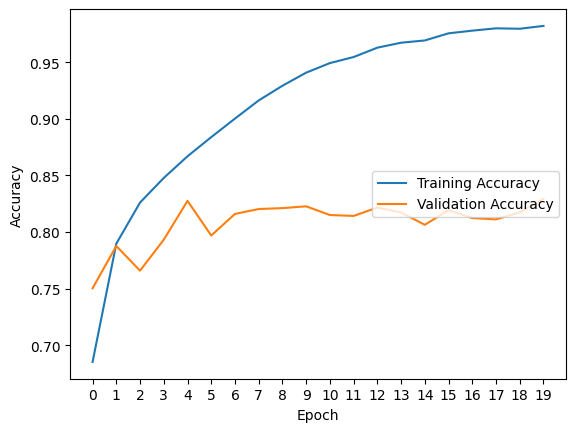

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='right')
plt.show()

In [ ]:
training_accuracies.append(history.history['accuracy'])
validation_accuracies.append(history.history['val_accuracy'])
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])

In [ ]:
print(matrix)

[[1230   78   75   22   19    0    1   76   34   22]
 [  38  981   28    0    0    0    0    2    0    0]
 [  38   28  869    0    7    0    0    2    0    0]
 [   9    0    5   82   47    0   62    3    0    0]
 [  10    0    8   15  828   11   48    0    0    0]
 [   0    0    0    0   32   61    0    0    0    0]
 [   1    0    2   12   23    0  317    1    0    0]
 [  59    1    9    4    1    0    0  385   45    0]
 [  35    0    0    0    0    0    0   73  284   16]
 [  19    0    0    1    7    0    1    3   27  176]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(0,10,1)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1557
           1       0.90      0.94      0.92      1049
           2       0.87      0.92      0.90       944
           3       0.60      0.39      0.48       208
           4       0.86      0.90      0.88       920
           5       0.85      0.66      0.74        93
           6       0.74      0.89      0.81       356
           7       0.71      0.76      0.73       504
           8       0.73      0.70      0.71       408
           9       0.82      0.75      0.79       234

    accuracy                           0.83      6273
   macro avg       0.79      0.77      0.78      6273
weighted avg       0.83      0.83      0.83      6273



None


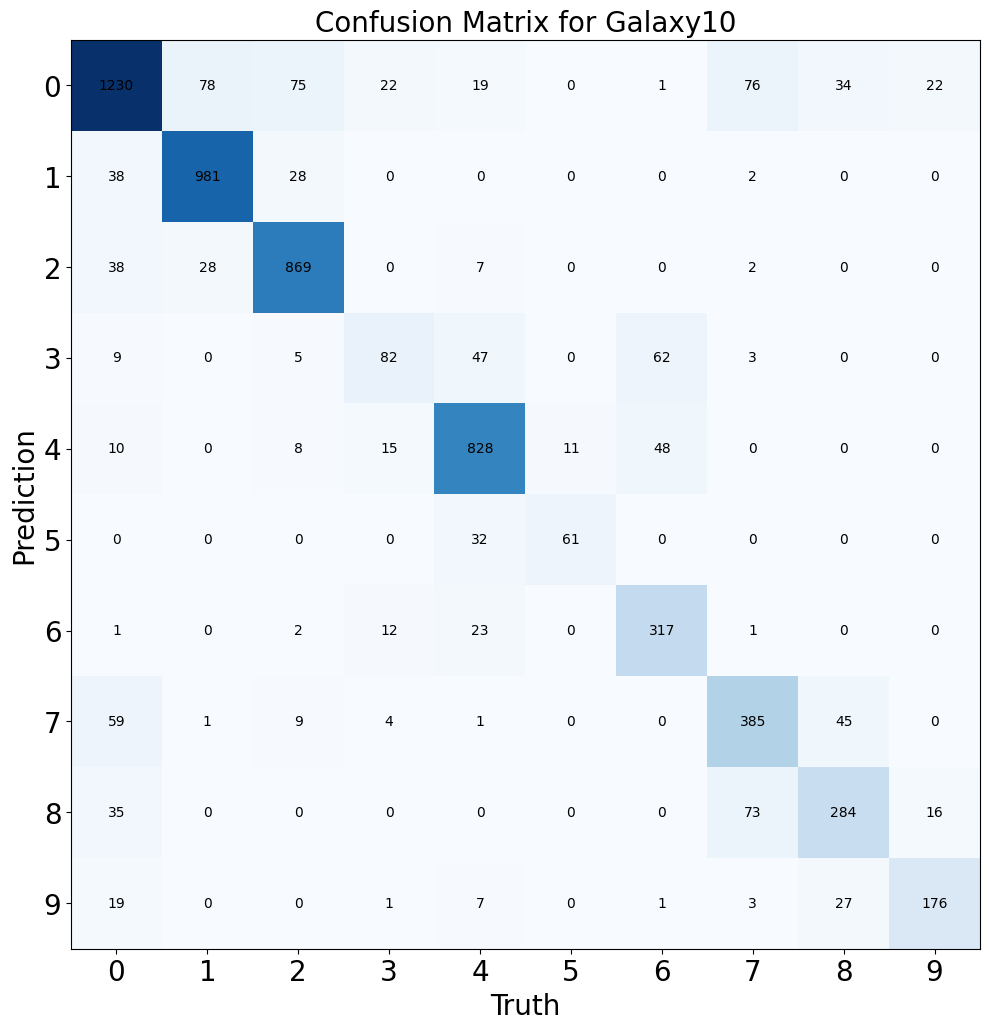

In [ ]:
print(galaxy10_confusion(matrix))

In [ ]:
for i in range(0,10):
  print(galaxy10cls_lookup(int(i)))

Disk, Face-on, No Spiral
Smooth, Completely round
Smooth, in-between round
Smooth, Cigar shaped
Disk, Edge-on, Rounded Bulge
Disk, Edge-on, Boxy Bulge
Disk, Edge-on, No Bulge
Disk, Face-on, Tight Spiral
Disk, Face-on, Medium Spiral
Disk, Face-on, Loose Spiral


ResNet

In [ ]:
from keras.applications import ResNet50
from keras.models import Model
import keras

resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(69,69,3))

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
for layer in resnet50.layers[:143]:
  layer.trainable=False

In [ ]:
for i, layer in enumerate(resnet50.layers):
  print(i, layer.name, '-', layer.trainable)

0 input_2 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [ ]:
x = resnet50.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
# x = Dense(32, activation='relu')(x)
# x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=resnet50.input, outputs=x)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=5e-5), metrics=["accuracy", top2_acc, top3_acc, top4_acc, "top_k_categorical_accuracy"])
history = transfer_model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), callbacks=[lr_reduce,checkpoint], class_weight=class_weights)

Epoch 1/20
913/913 [==============================] - ETA: 0s - loss: 1.6099 - accuracy: 0.4442 - top2_acc: 0.6718 - top3_acc: 0.8141 - top4_acc: 0.8805 - top_k_categorical_accuracy: 0.9265
Epoch 1: val_accuracy improved from -inf to 0.26798, saving model to vgg16_finetune.h15


913/913 [==============================] - 53s 46ms/step - loss: 1.6099 - accuracy: 0.4442 - top2_acc: 0.6718 - top3_acc: 0.8141 - top4_acc: 0.8805 - top_k_categorical_accuracy: 0.9265 - val_loss: 2.0576 - val_accuracy: 0.2680 - val_top2_acc: 0.5284 - val_top3_acc: 0.7200 - val_top4_acc: 0.8518 - val_top_k_categorical_accuracy: 0.8992 - lr: 5.0000e-05
Epoch 2/20
913/913 [==============================] - ETA: 0s - loss: 1.3877 - accuracy: 0.5087 - top2_acc: 0.7380 - top3_acc: 0.8687 - top4_acc: 0.9245 - top_k_categorical_accuracy: 0.9573
Epoch 2: val_accuracy did not improve from 0.26798
913/913 [==============================] - 19s 21ms/step - loss: 1.3877 - accuracy: 0.5087 - top2_acc: 0.7380 - top3_acc: 0.8687 - top4_acc: 0.9245 - top_k_categorical_accuracy: 0.9573 - val_loss: 3.3746 - val_accuracy: 0.1486 - val_top2_acc: 0.3369 - val_top3_acc: 0.4033 - val_top4_acc: 0.5115 - val_top_k_categorical_accuracy: 0.6028 - lr: 5.0000e-05
Epoch 3/20
913/913 [==============================]

913/913 [==============================] - 40s 43ms/step - loss: 1.1508 - accuracy: 0.5841 - top2_acc: 0.7977 - top3_acc: 0.9156 - top4_acc: 0.9577 - top_k_categorical_accuracy: 0.9784 - val_loss: 6.7599 - val_accuracy: 0.3207 - val_top2_acc: 0.4567 - val_top3_acc: 0.5320 - val_top4_acc: 0.6084 - val_top_k_categorical_accuracy: 0.7596 - lr: 5.0000e-05
Epoch 9/20
913/913 [==============================] - ETA: 0s - loss: 1.1208 - accuracy: 0.5950 - top2_acc: 0.8081 - top3_acc: 0.9188 - top4_acc: 0.9603 - top_k_categorical_accuracy: 0.9814
Epoch 9: val_accuracy did not improve from 0.32068
913/913 [==============================] - 19s 21ms/step - loss: 1.1208 - accuracy: 0.5950 - top2_acc: 0.8081 - top3_acc: 0.9188 - top4_acc: 0.9603 - top_k_categorical_accuracy: 0.9814 - val_loss: 3.9753 - val_accuracy: 0.2459 - val_top2_acc: 0.3787 - val_top3_acc: 0.4628 - val_top4_acc: 0.6760 - val_top_k_categorical_accuracy: 0.8156 - lr: 5.0000e-05
Epoch 10/20
913/913 [==============================

913/913 [==============================] - 40s 44ms/step - loss: 1.0798 - accuracy: 0.6113 - top2_acc: 0.8183 - top3_acc: 0.9242 - top4_acc: 0.9627 - top_k_categorical_accuracy: 0.9830 - val_loss: 2.5336 - val_accuracy: 0.3321 - val_top2_acc: 0.5203 - val_top3_acc: 0.6487 - val_top4_acc: 0.7650 - val_top_k_categorical_accuracy: 0.8228 - lr: 5.0000e-05
Epoch 12/20
913/913 [==============================] - ETA: 0s - loss: 1.0702 - accuracy: 0.6120 - top2_acc: 0.8211 - top3_acc: 0.9270 - top4_acc: 0.9655 - top_k_categorical_accuracy: 0.9838
Epoch 12: val_accuracy did not improve from 0.33205
913/913 [==============================] - 19s 21ms/step - loss: 1.0702 - accuracy: 0.6120 - top2_acc: 0.8211 - top3_acc: 0.9270 - top4_acc: 0.9655 - top_k_categorical_accuracy: 0.9838 - val_loss: 3.0444 - val_accuracy: 0.3058 - val_top2_acc: 0.4951 - val_top3_acc: 0.5927 - val_top4_acc: 0.6643 - val_top_k_categorical_accuracy: 0.7581 - lr: 5.0000e-05
Epoch 13/20
913/913 [============================

913/913 [==============================] - 41s 45ms/step - loss: 0.9994 - accuracy: 0.6375 - top2_acc: 0.8371 - top3_acc: 0.9358 - top4_acc: 0.9690 - top_k_categorical_accuracy: 0.9861 - val_loss: 3.7010 - val_accuracy: 0.3655 - val_top2_acc: 0.5315 - val_top3_acc: 0.6772 - val_top4_acc: 0.7903 - val_top_k_categorical_accuracy: 0.8869 - lr: 5.0000e-05
Epoch 18/20
913/913 [==============================] - ETA: 0s - loss: 0.9841 - accuracy: 0.6438 - top2_acc: 0.8431 - top3_acc: 0.9399 - top4_acc: 0.9727 - top_k_categorical_accuracy: 0.9879
Epoch 18: val_accuracy did not improve from 0.36553
913/913 [==============================] - 19s 21ms/step - loss: 0.9841 - accuracy: 0.6438 - top2_acc: 0.8431 - top3_acc: 0.9399 - top4_acc: 0.9727 - top_k_categorical_accuracy: 0.9879 - val_loss: 8.9232 - val_accuracy: 0.0959 - val_top2_acc: 0.3085 - val_top3_acc: 0.3822 - val_top4_acc: 0.5272 - val_top_k_categorical_accuracy: 0.6412 - lr: 5.0000e-05
Epoch 19/20
913/913 [============================

In [ ]:
transfer_model.evaluate(X_test, y_test)[1]

197/197 [==============================] - 3s 13ms/step - loss: 3.0236 - accuracy: 0.2158 - top2_acc: 0.3751 - top3_acc: 0.5379 - top4_acc: 0.6553 - top_k_categorical_accuracy: 0.7626


0.21584568917751312

In [ ]:
y_pred = transfer_model.predict(X_test)

197/197 [==============================] - 3s 10ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

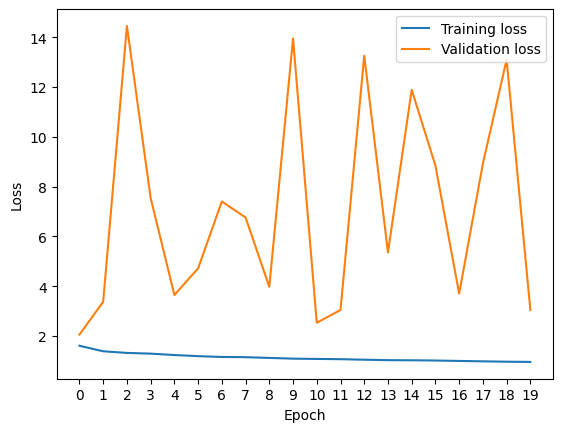

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

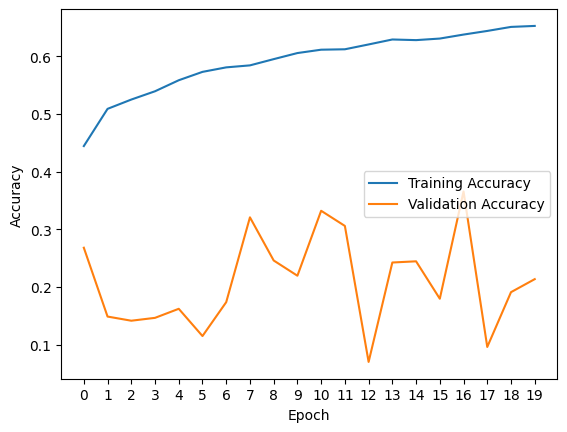

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='right')
plt.show()

In [ ]:
print(matrix)

[[489  10 517   0   0   0   0 533   8   0]
 [405  67 136   0   0   0   0 441   0   0]
 [387  50 429   0   0   0   0  78   0   0]
 [ 91   0 104   0   6   0   0   7   0   0]
 [524   0 339   0  43   0   0  14   0   0]
 [ 49   0  29   0  13   0   0   2   0   0]
 [313   0  36   0   3   0   0   4   0   0]
 [ 38   2 138   0   0   0   0 325   1   0]
 [ 93   0  91   0   0   0   0 223   1   0]
 [132   0  72   0   0   0   0  30   0   0]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(0,10,1)))

              precision    recall  f1-score   support

           0       0.19      0.31      0.24      1557
           1       0.52      0.06      0.11      1049
           2       0.23      0.45      0.30       944
           3       0.00      0.00      0.00       208
           4       0.66      0.05      0.09       920
           5       0.00      0.00      0.00        93
           6       0.00      0.00      0.00       356
           7       0.20      0.64      0.30       504
           8       0.10      0.00      0.00       408
           9       0.00      0.00      0.00       234

    accuracy                           0.22      6273
   macro avg       0.19      0.15      0.10      6273
weighted avg       0.29      0.22      0.16      6273



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


None


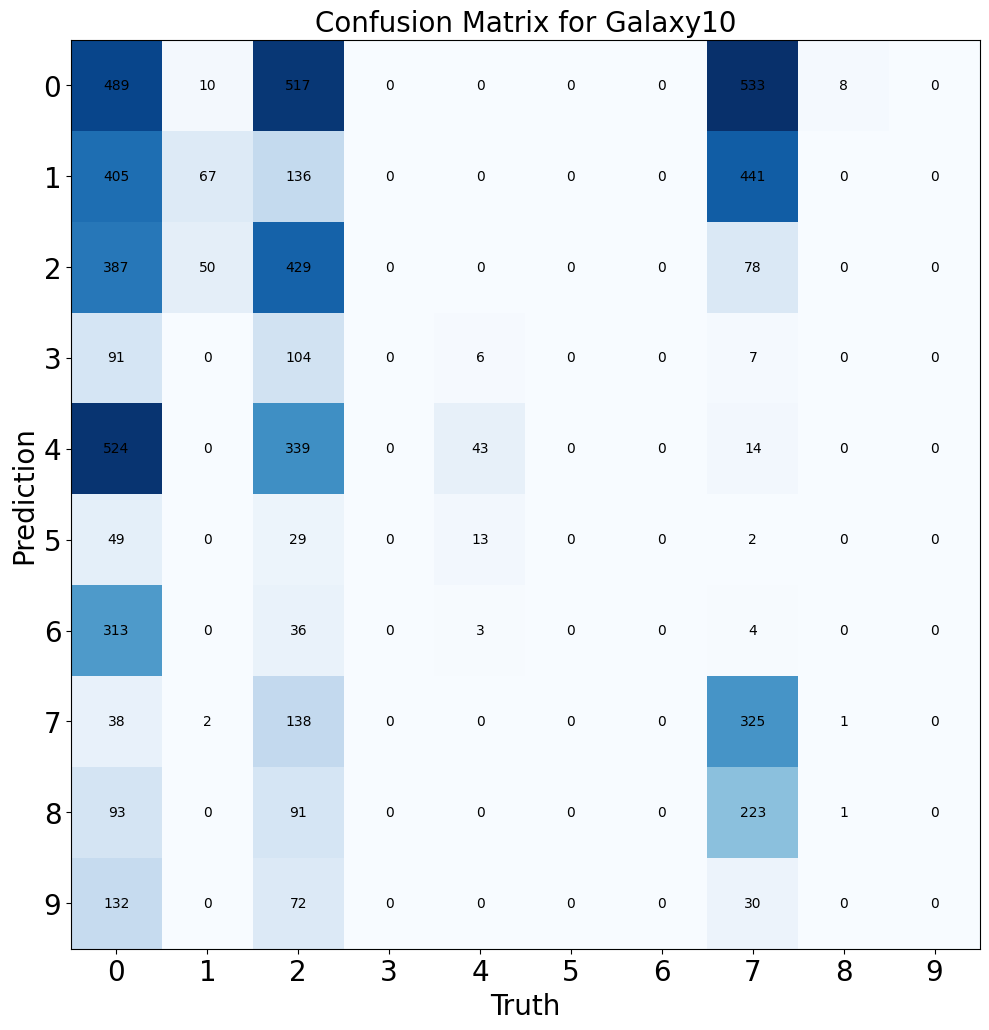

In [ ]:
print(galaxy10_confusion(matrix))

In [ ]:
training_accuracies.append(history.history['accuracy'])
validation_accuracies.append(history.history['val_accuracy'])
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])

Xception

In [ ]:
from keras.applications import Xception
from keras.models import Model
import keras

xception = Xception(include_top=False, weights='imagenet', input_shape=(75,75,3))

83683744/83683744 [==============================] - 4s 0us/step


In [ ]:
# for layer in xception.layers[:86]:
#   layer.trainable=False

In [ ]:
for i, layer in enumerate(xception.layers):
  print(i, layer.name, '-', layer.trainable)

0 input_3 - True
1 block1_conv1 - True
2 block1_conv1_bn - True
3 block1_conv1_act - True
4 block1_conv2 - True
5 block1_conv2_bn - True
6 block1_conv2_act - True
7 block2_sepconv1 - True
8 block2_sepconv1_bn - True
9 block2_sepconv2_act - True
10 block2_sepconv2 - True
11 block2_sepconv2_bn - True
12 conv2d - True
13 block2_pool - True
14 batch_normalization - True
15 add - True
16 block3_sepconv1_act - True
17 block3_sepconv1 - True
18 block3_sepconv1_bn - True
19 block3_sepconv2_act - True
20 block3_sepconv2 - True
21 block3_sepconv2_bn - True
22 conv2d_1 - True
23 block3_pool - True
24 batch_normalization_1 - True
25 add_1 - True
26 block4_sepconv1_act - True
27 block4_sepconv1 - True
28 block4_sepconv1_bn - True
29 block4_sepconv2_act - True
30 block4_sepconv2 - True
31 block4_sepconv2_bn - True
32 conv2d_2 - True
33 block4_pool - True
34 batch_normalization_2 - True
35 add_2 - True
36 block5_sepconv1_act - True
37 block5_sepconv1 - True
38 block5_sepconv1_bn - True
39 block5_sepc

In [ ]:
x = xception.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
# x = Dense(32, activation='relu')(x)
# x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=xception.input, outputs=x)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=5e-5), metrics=["accuracy", top2_acc, top3_acc, top4_acc, "top_k_categorical_accuracy"])
history = transfer_model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_val_resized,y_val), callbacks=[lr_reduce,checkpoint], class_weight=class_weights)

Epoch 1/20
913/913 [==============================] - ETA: 0s - loss: 0.8660 - accuracy: 0.6986 - top2_acc: 0.8770 - top3_acc: 0.9504 - top4_acc: 0.9723 - top_k_categorical_accuracy: 0.9832
Epoch 1: val_accuracy improved from -inf to 0.76998, saving model to vgg16_finetune.h15


913/913 [==============================] - 89s 63ms/step - loss: 0.8660 - accuracy: 0.6986 - top2_acc: 0.8770 - top3_acc: 0.9504 - top4_acc: 0.9723 - top_k_categorical_accuracy: 0.9832 - val_loss: 0.6276 - val_accuracy: 0.7700 - val_top2_acc: 0.9303 - val_top3_acc: 0.9806 - val_top4_acc: 0.9934 - val_top_k_categorical_accuracy: 0.9970 - lr: 5.0000e-05
Epoch 2/20
913/913 [==============================] - ETA: 0s - loss: 0.5094 - accuracy: 0.8180 - top2_acc: 0.9528 - top3_acc: 0.9898 - top4_acc: 0.9971 - top_k_categorical_accuracy: 0.9992
Epoch 2: val_accuracy improved from 0.76998 to 0.79241, saving model to vgg16_finetune.h15


913/913 [==============================] - 56s 61ms/step - loss: 0.5094 - accuracy: 0.8180 - top2_acc: 0.9528 - top3_acc: 0.9898 - top4_acc: 0.9971 - top_k_categorical_accuracy: 0.9992 - val_loss: 0.5954 - val_accuracy: 0.7924 - val_top2_acc: 0.9403 - val_top3_acc: 0.9869 - val_top4_acc: 0.9950 - val_top_k_categorical_accuracy: 0.9984 - lr: 5.0000e-05
Epoch 3/20
912/913 [============================>.] - ETA: 0s - loss: 0.3354 - accuracy: 0.8822 - top2_acc: 0.9775 - top3_acc: 0.9965 - top4_acc: 0.9990 - top_k_categorical_accuracy: 0.9999
Epoch 3: val_accuracy did not improve from 0.79241
913/913 [==============================] - 35s 39ms/step - loss: 0.3355 - accuracy: 0.8822 - top2_acc: 0.9775 - top3_acc: 0.9965 - top4_acc: 0.9990 - top_k_categorical_accuracy: 0.9999 - val_loss: 0.6740 - val_accuracy: 0.7806 - val_top2_acc: 0.9370 - val_top3_acc: 0.9848 - val_top4_acc: 0.9971 - val_top_k_categorical_accuracy: 0.9990 - lr: 5.0000e-05
Epoch 4/20
913/913 [==============================]

913/913 [==============================] - 55s 60ms/step - loss: 0.0564 - accuracy: 0.9822 - top2_acc: 0.9986 - top3_acc: 0.9999 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 1.0633 - val_accuracy: 0.7969 - val_top2_acc: 0.9375 - val_top3_acc: 0.9814 - val_top4_acc: 0.9944 - val_top_k_categorical_accuracy: 0.9976 - lr: 5.0000e-05
Epoch 12/20
913/913 [==============================] - ETA: 0s - loss: 0.0456 - accuracy: 0.9849 - top2_acc: 0.9989 - top3_acc: 0.9999 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000
Epoch 12: val_accuracy improved from 0.79689 to 0.79801, saving model to vgg16_finetune.h15


913/913 [==============================] - 55s 60ms/step - loss: 0.0456 - accuracy: 0.9849 - top2_acc: 0.9989 - top3_acc: 0.9999 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 1.1831 - val_accuracy: 0.7980 - val_top2_acc: 0.9375 - val_top3_acc: 0.9829 - val_top4_acc: 0.9939 - val_top_k_categorical_accuracy: 0.9970 - lr: 5.0000e-05
Epoch 13/20
913/913 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9850 - top2_acc: 0.9994 - top3_acc: 1.0000 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000
Epoch 13: val_accuracy did not improve from 0.79801
913/913 [==============================] - 35s 38ms/step - loss: 0.0441 - accuracy: 0.9850 - top2_acc: 0.9994 - top3_acc: 1.0000 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 1.1614 - val_accuracy: 0.7874 - val_top2_acc: 0.9404 - val_top3_acc: 0.9781 - val_top4_acc: 0.9930 - val_top_k_categorical_accuracy: 0.9974 - lr: 5.0000e-05
Epoch 14/20
913/913 [============================

913/913 [==============================] - 55s 60ms/step - loss: 0.0388 - accuracy: 0.9871 - top2_acc: 0.9991 - top3_acc: 1.0000 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 1.2112 - val_accuracy: 0.7982 - val_top2_acc: 0.9329 - val_top3_acc: 0.9787 - val_top4_acc: 0.9899 - val_top_k_categorical_accuracy: 0.9949 - lr: 5.0000e-05
Epoch 17/20
913/913 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9890 - top2_acc: 0.9995 - top3_acc: 0.9999 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000
Epoch 17: val_accuracy did not improve from 0.79817
913/913 [==============================] - 36s 39ms/step - loss: 0.0345 - accuracy: 0.9890 - top2_acc: 0.9995 - top3_acc: 0.9999 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 1.1962 - val_accuracy: 0.7906 - val_top2_acc: 0.9375 - val_top3_acc: 0.9789 - val_top4_acc: 0.9920 - val_top_k_categorical_accuracy: 0.9968 - lr: 5.0000e-05
Epoch 18/20
913/913 [============================

In [ ]:
transfer_model.evaluate(X_test_resized, y_test)[1]

197/197 [==============================] - 3s 13ms/step - loss: 1.2561 - accuracy: 0.8025 - top2_acc: 0.9405 - top3_acc: 0.9825 - top4_acc: 0.9922 - top_k_categorical_accuracy: 0.9962


0.8024868369102478

In [ ]:
y_pred = transfer_model.predict(X_test_resized)

197/197 [==============================] - 3s 8ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

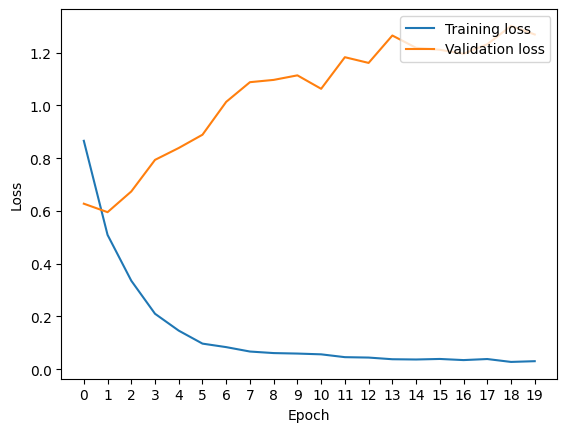

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

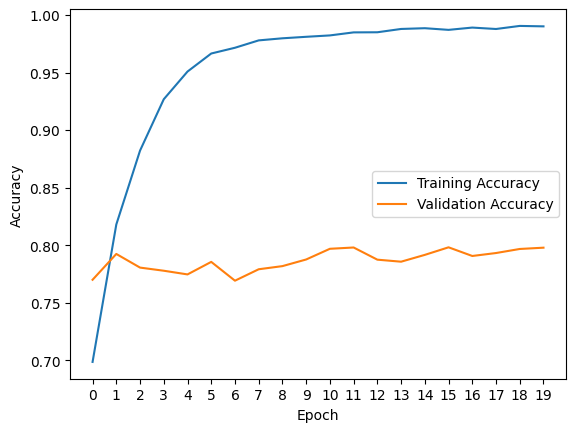

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='right')
plt.show()

In [ ]:
print(matrix)

[[1197   64   89   20   23    0    2   56   77   29]
 [  46  974   23    0    0    0    0    4    2    0]
 [  53   41  837    1    3    0    0    4    2    3]
 [   5    0    3  109   43    0   44    4    0    0]
 [  14    0    8   30  814   17   37    0    0    0]
 [   0    0    0    0   48   45    0    0    0    0]
 [   0    0    1   18   40    0  297    0    0    0]
 [  84    3    6    2    1    0    1  317   88    2]
 [  69    1    5    0    0    0    0   20  290   23]
 [  25    0    3    3    9    0    2    1   37  154]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(0,10,1)))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1557
           1       0.90      0.93      0.91      1049
           2       0.86      0.89      0.87       944
           3       0.60      0.52      0.56       208
           4       0.83      0.88      0.86       920
           5       0.73      0.48      0.58        93
           6       0.78      0.83      0.80       356
           7       0.78      0.63      0.70       504
           8       0.58      0.71      0.64       408
           9       0.73      0.66      0.69       234

    accuracy                           0.80      6273
   macro avg       0.76      0.73      0.74      6273
weighted avg       0.80      0.80      0.80      6273



None


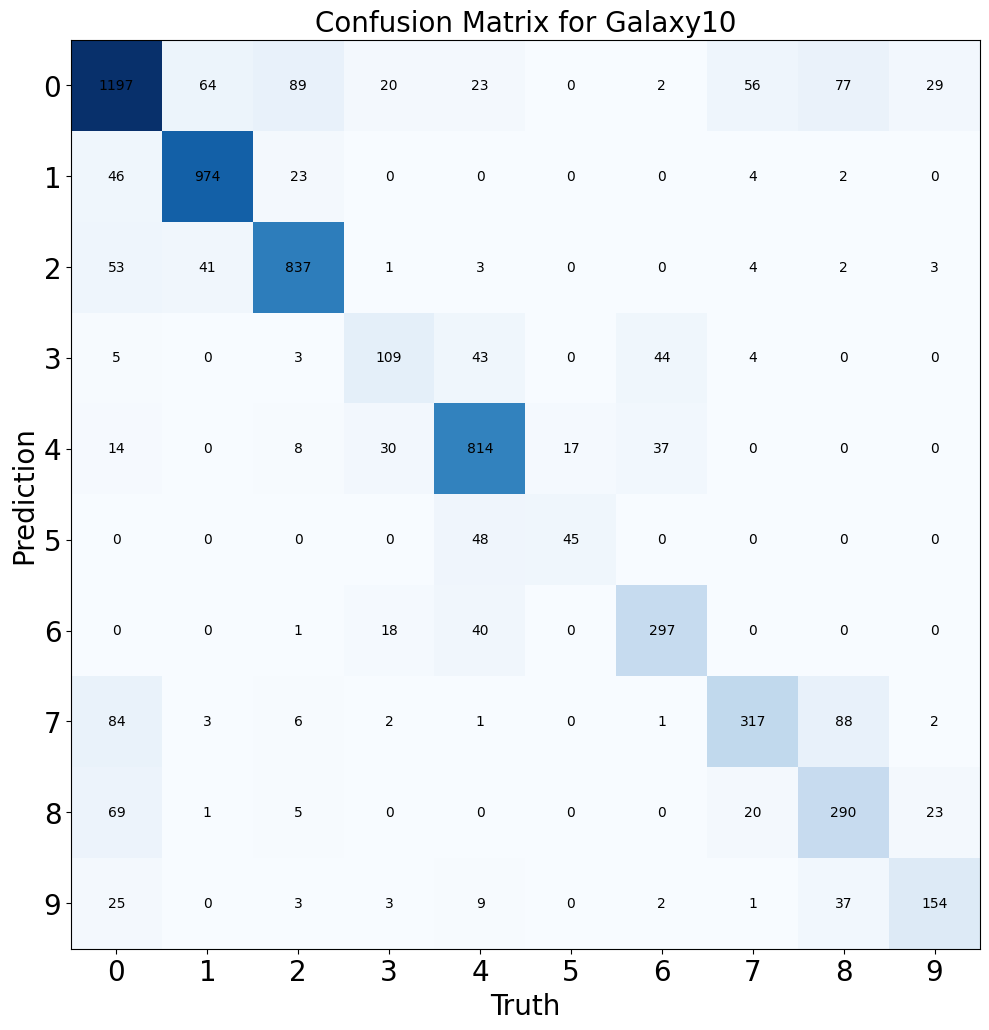

In [ ]:
print(galaxy10_confusion(matrix))

In [ ]:
training_accuracies.append(history.history['accuracy'])
validation_accuracies.append(history.history['val_accuracy'])
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])

Inception

In [ ]:
from keras.applications import InceptionV3
from keras.models import Model
import keras

inceptionv3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(75,75,3))

87910968/87910968 [==============================] - 4s 0us/step


In [ ]:
# for layer in inceptionv3.layers[:184]:
#     layer.trainable = False

In [ ]:
for i, layer in enumerate(inceptionv3.layers):
    print(i, layer.name, layer.trainable)

0 input_4 True
1 conv2d_4 True
2 batch_normalization_4 True
3 activation True
4 conv2d_5 True
5 batch_normalization_5 True
6 activation_1 True
7 conv2d_6 True
8 batch_normalization_6 True
9 activation_2 True
10 max_pooling2d True
11 conv2d_7 True
12 batch_normalization_7 True
13 activation_3 True
14 conv2d_8 True
15 batch_normalization_8 True
16 activation_4 True
17 max_pooling2d_1 True
18 conv2d_12 True
19 batch_normalization_12 True
20 activation_8 True
21 conv2d_10 True
22 conv2d_13 True
23 batch_normalization_10 True
24 batch_normalization_13 True
25 activation_6 True
26 activation_9 True
27 average_pooling2d True
28 conv2d_9 True
29 conv2d_11 True
30 conv2d_14 True
31 conv2d_15 True
32 batch_normalization_9 True
33 batch_normalization_11 True
34 batch_normalization_14 True
35 batch_normalization_15 True
36 activation_5 True
37 activation_7 True
38 activation_10 True
39 activation_11 True
40 mixed0 True
41 conv2d_19 True
42 batch_normalization_19 True
43 activation_15 True
44 conv2

In [ ]:
x = inceptionv3.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
# x = Dense(32, activation='relu')(x)
# x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=inceptionv3.input, outputs=x)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=5e-5), metrics=["accuracy", top2_acc, top3_acc, top4_acc, "top_k_categorical_accuracy"])
history = transfer_model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_val_resized, y_val), callbacks=[lr_reduce,checkpoint], class_weight=class_weights)

Epoch 1/20
913/913 [==============================] - ETA: 0s - loss: 1.2343 - accuracy: 0.5758 - top2_acc: 0.7850 - top3_acc: 0.8918 - top4_acc: 0.9335 - top_k_categorical_accuracy: 0.9570
Epoch 1: val_accuracy improved from -inf to 0.70255, saving model to vgg16_finetune.h15


913/913 [==============================] - 130s 99ms/step - loss: 1.2343 - accuracy: 0.5758 - top2_acc: 0.7850 - top3_acc: 0.8918 - top4_acc: 0.9335 - top_k_categorical_accuracy: 0.9570 - val_loss: 0.8078 - val_accuracy: 0.7025 - val_top2_acc: 0.8922 - val_top3_acc: 0.9662 - val_top4_acc: 0.9875 - val_top_k_categorical_accuracy: 0.9947 - lr: 5.0000e-05
Epoch 2/20
913/913 [==============================] - ETA: 0s - loss: 0.7794 - accuracy: 0.7257 - top2_acc: 0.9044 - top3_acc: 0.9717 - top4_acc: 0.9893 - top_k_categorical_accuracy: 0.9954
Epoch 2: val_accuracy improved from 0.70255 to 0.76966, saving model to vgg16_finetune.h15


913/913 [==============================] - 87s 95ms/step - loss: 0.7794 - accuracy: 0.7257 - top2_acc: 0.9044 - top3_acc: 0.9717 - top4_acc: 0.9893 - top_k_categorical_accuracy: 0.9954 - val_loss: 0.6752 - val_accuracy: 0.7697 - val_top2_acc: 0.9303 - val_top3_acc: 0.9793 - val_top4_acc: 0.9923 - val_top_k_categorical_accuracy: 0.9973 - lr: 5.0000e-05
Epoch 3/20
913/913 [==============================] - ETA: 0s - loss: 0.6194 - accuracy: 0.7826 - top2_acc: 0.9382 - top3_acc: 0.9848 - top4_acc: 0.9951 - top_k_categorical_accuracy: 0.9984
Epoch 3: val_accuracy improved from 0.76966 to 0.78920, saving model to vgg16_finetune.h15


913/913 [==============================] - 86s 94ms/step - loss: 0.6194 - accuracy: 0.7826 - top2_acc: 0.9382 - top3_acc: 0.9848 - top4_acc: 0.9951 - top_k_categorical_accuracy: 0.9984 - val_loss: 0.5844 - val_accuracy: 0.7892 - val_top2_acc: 0.9422 - val_top3_acc: 0.9854 - val_top4_acc: 0.9952 - val_top_k_categorical_accuracy: 0.9978 - lr: 5.0000e-05
Epoch 4/20
913/913 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.8208 - top2_acc: 0.9547 - top3_acc: 0.9902 - top4_acc: 0.9972 - top_k_categorical_accuracy: 0.9990
Epoch 4: val_accuracy improved from 0.78920 to 0.79209, saving model to vgg16_finetune.h15


913/913 [==============================] - 86s 95ms/step - loss: 0.5106 - accuracy: 0.8208 - top2_acc: 0.9547 - top3_acc: 0.9902 - top4_acc: 0.9972 - top_k_categorical_accuracy: 0.9990 - val_loss: 0.5805 - val_accuracy: 0.7921 - val_top2_acc: 0.9431 - val_top3_acc: 0.9877 - val_top4_acc: 0.9962 - val_top_k_categorical_accuracy: 0.9990 - lr: 5.0000e-05
Epoch 5/20
912/913 [============================>.] - ETA: 0s - loss: 0.4220 - accuracy: 0.8531 - top2_acc: 0.9678 - top3_acc: 0.9931 - top4_acc: 0.9981 - top_k_categorical_accuracy: 0.9992
Epoch 5: val_accuracy improved from 0.79209 to 0.79353, saving model to vgg16_finetune.h15


913/913 [==============================] - 86s 94ms/step - loss: 0.4221 - accuracy: 0.8531 - top2_acc: 0.9677 - top3_acc: 0.9932 - top4_acc: 0.9981 - top_k_categorical_accuracy: 0.9992 - val_loss: 0.5833 - val_accuracy: 0.7935 - val_top2_acc: 0.9489 - val_top3_acc: 0.9865 - val_top4_acc: 0.9965 - val_top_k_categorical_accuracy: 0.9986 - lr: 5.0000e-05
Epoch 6/20
912/913 [============================>.] - ETA: 0s - loss: 0.3494 - accuracy: 0.8786 - top2_acc: 0.9778 - top3_acc: 0.9955 - top4_acc: 0.9989 - top_k_categorical_accuracy: 0.9998
Epoch 6: val_accuracy improved from 0.79353 to 0.79497, saving model to vgg16_finetune.h15


913/913 [==============================] - 86s 94ms/step - loss: 0.3498 - accuracy: 0.8784 - top2_acc: 0.9777 - top3_acc: 0.9955 - top4_acc: 0.9989 - top_k_categorical_accuracy: 0.9998 - val_loss: 0.6008 - val_accuracy: 0.7950 - val_top2_acc: 0.9481 - val_top3_acc: 0.9861 - val_top4_acc: 0.9957 - val_top_k_categorical_accuracy: 0.9981 - lr: 5.0000e-05
Epoch 7/20
912/913 [============================>.] - ETA: 0s - loss: 0.2864 - accuracy: 0.9019 - top2_acc: 0.9850 - top3_acc: 0.9976 - top4_acc: 0.9995 - top_k_categorical_accuracy: 0.9999
Epoch 7: val_accuracy did not improve from 0.79497
913/913 [==============================] - 49s 54ms/step - loss: 0.2864 - accuracy: 0.9018 - top2_acc: 0.9849 - top3_acc: 0.9976 - top4_acc: 0.9995 - top_k_categorical_accuracy: 0.9999 - val_loss: 0.6609 - val_accuracy: 0.7874 - val_top2_acc: 0.9430 - val_top3_acc: 0.9859 - val_top4_acc: 0.9952 - val_top_k_categorical_accuracy: 0.9986 - lr: 5.0000e-05
Epoch 8/20
913/913 [==============================]

913/913 [==============================] - 85s 93ms/step - loss: 0.2320 - accuracy: 0.9201 - top2_acc: 0.9901 - top3_acc: 0.9987 - top4_acc: 0.9997 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6071 - val_accuracy: 0.8065 - val_top2_acc: 0.9473 - val_top3_acc: 0.9872 - val_top4_acc: 0.9960 - val_top_k_categorical_accuracy: 0.9984 - lr: 5.0000e-05
Epoch 9/20
913/913 [==============================] - ETA: 0s - loss: 0.1937 - accuracy: 0.9341 - top2_acc: 0.9924 - top3_acc: 0.9991 - top4_acc: 0.9997 - top_k_categorical_accuracy: 1.0000
Epoch 9: val_accuracy did not improve from 0.80650
913/913 [==============================] - 50s 54ms/step - loss: 0.1937 - accuracy: 0.9341 - top2_acc: 0.9924 - top3_acc: 0.9991 - top4_acc: 0.9997 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7185 - val_accuracy: 0.7916 - val_top2_acc: 0.9388 - val_top3_acc: 0.9861 - val_top4_acc: 0.9949 - val_top_k_categorical_accuracy: 0.9974 - lr: 5.0000e-05
Epoch 10/20
912/913 [============================>.

913/913 [==============================] - 86s 94ms/step - loss: 0.1372 - accuracy: 0.9540 - top2_acc: 0.9952 - top3_acc: 0.9996 - top4_acc: 0.9999 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7175 - val_accuracy: 0.8079 - val_top2_acc: 0.9460 - val_top3_acc: 0.9869 - val_top4_acc: 0.9958 - val_top_k_categorical_accuracy: 0.9981 - lr: 5.0000e-05
Epoch 12/20
912/913 [============================>.] - ETA: 0s - loss: 0.1139 - accuracy: 0.9610 - top2_acc: 0.9971 - top3_acc: 0.9997 - top4_acc: 0.9999 - top_k_categorical_accuracy: 1.0000
Epoch 12: val_accuracy did not improve from 0.80794
913/913 [==============================] - 50s 55ms/step - loss: 0.1139 - accuracy: 0.9610 - top2_acc: 0.9971 - top3_acc: 0.9997 - top4_acc: 0.9999 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.8538 - val_accuracy: 0.7905 - val_top2_acc: 0.9358 - val_top3_acc: 0.9798 - val_top4_acc: 0.9930 - val_top_k_categorical_accuracy: 0.9965 - lr: 5.0000e-05
Epoch 13/20
913/913 [============================

913/913 [==============================] - 86s 95ms/step - loss: 0.0604 - accuracy: 0.9794 - top2_acc: 0.9992 - top3_acc: 1.0000 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.8729 - val_accuracy: 0.8121 - val_top2_acc: 0.9412 - val_top3_acc: 0.9821 - val_top4_acc: 0.9926 - val_top_k_categorical_accuracy: 0.9965 - lr: 5.0000e-05
Epoch 19/20
913/913 [==============================] - ETA: 0s - loss: 0.0600 - accuracy: 0.9812 - top2_acc: 0.9984 - top3_acc: 0.9998 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000
Epoch 19: val_accuracy did not improve from 0.81211
913/913 [==============================] - 50s 55ms/step - loss: 0.0600 - accuracy: 0.9812 - top2_acc: 0.9984 - top3_acc: 0.9998 - top4_acc: 1.0000 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.9040 - val_accuracy: 0.8041 - val_top2_acc: 0.9374 - val_top3_acc: 0.9827 - val_top4_acc: 0.9931 - val_top_k_categorical_accuracy: 0.9968 - lr: 5.0000e-05
Epoch 20/20
913/913 [============================

In [ ]:
transfer_model.evaluate(X_test_resized, y_test)[1]

197/197 [==============================] - 3s 16ms/step - loss: 0.8105 - accuracy: 0.8089 - top2_acc: 0.9471 - top3_acc: 0.9844 - top4_acc: 0.9935 - top_k_categorical_accuracy: 0.9959


0.8088634014129639

In [ ]:
y_pred = transfer_model.predict(X_test_resized)

197/197 [==============================] - 4s 11ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
print(matrix)

[[1307   53   60   14   14    0    2   45   27   35]
 [ 126  883   37    0    0    0    0    2    1    0]
 [  81   42  819    1    0    0    0    0    0    1]
 [   5    0   10  114   38    0   37    3    0    1]
 [  18    0    7   29  789   42   35    0    0    0]
 [   0    0    0    0   17   76    0    0    0    0]
 [   1    0    1   25   18    1  310    0    0    0]
 [  72    2    9    2    0    0    0  360   57    2]
 [  63    2    2    0    0    0    0   49  260   32]
 [  38    0    2    0    6    0    2    1   29  156]]


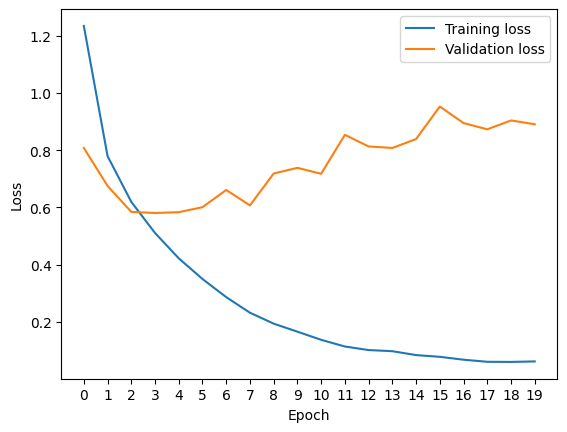

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

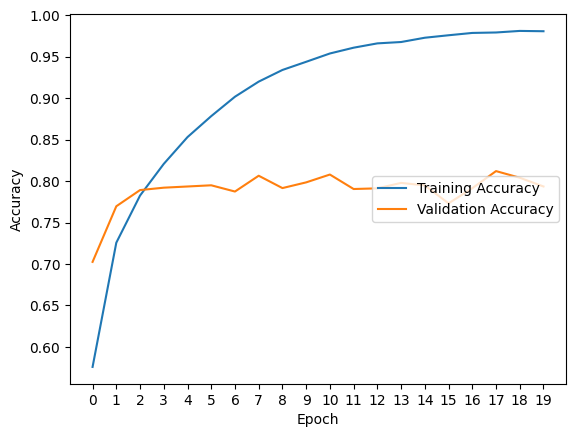

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='right')
plt.show()

In [ ]:
print(matrix)

[[1307   53   60   14   14    0    2   45   27   35]
 [ 126  883   37    0    0    0    0    2    1    0]
 [  81   42  819    1    0    0    0    0    0    1]
 [   5    0   10  114   38    0   37    3    0    1]
 [  18    0    7   29  789   42   35    0    0    0]
 [   0    0    0    0   17   76    0    0    0    0]
 [   1    0    1   25   18    1  310    0    0    0]
 [  72    2    9    2    0    0    0  360   57    2]
 [  63    2    2    0    0    0    0   49  260   32]
 [  38    0    2    0    6    0    2    1   29  156]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(0,10,1)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1557
           1       0.90      0.84      0.87      1049
           2       0.86      0.87      0.87       944
           3       0.62      0.55      0.58       208
           4       0.89      0.86      0.88       920
           5       0.64      0.82      0.72        93
           6       0.80      0.87      0.84       356
           7       0.78      0.71      0.75       504
           8       0.70      0.64      0.66       408
           9       0.69      0.67      0.68       234

    accuracy                           0.81      6273
   macro avg       0.76      0.77      0.76      6273
weighted avg       0.81      0.81      0.81      6273



None


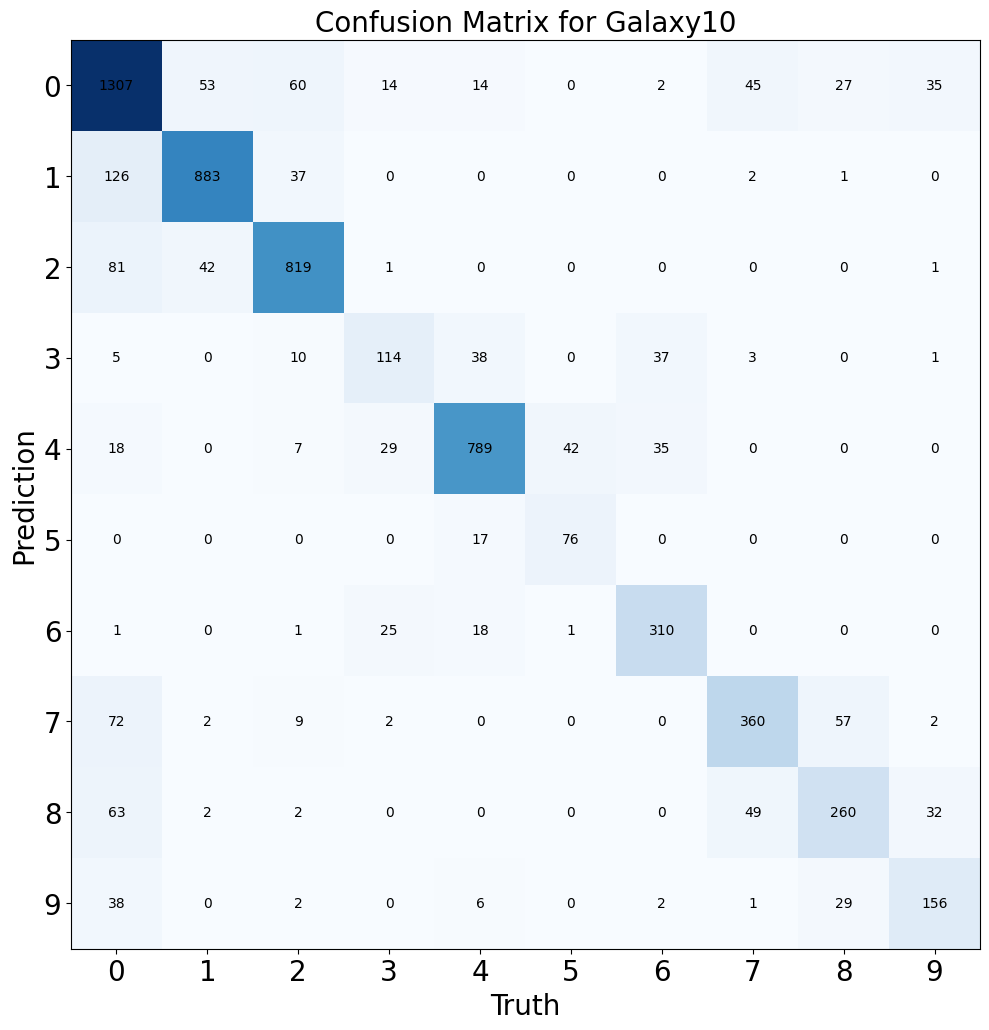

In [ ]:
print(galaxy10_confusion(matrix))

In [ ]:
training_accuracies.append(history.history['accuracy'])
validation_accuracies.append(history.history['val_accuracy'])
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])

DenseNet

In [ ]:
from keras.applications import DenseNet121
from keras.models import Model
import keras

densenet121 = DenseNet121(include_top=False, weights='imagenet', input_shape=(69,69,3))

29084464/29084464 [==============================] - 1s 0us/step


In [ ]:
# for layer in densenet121.layers[:141]:
#     layer.trainable = False

In [ ]:
for i, layer in enumerate(densenet121.layers):
    print(i, layer.name, layer.trainable)

0 input_5 True
1 zero_padding2d True
2 conv1/conv True
3 conv1/bn True
4 conv1/relu True
5 zero_padding2d_1 True
6 pool1 True
7 conv2_block1_0_bn True
8 conv2_block1_0_relu True
9 conv2_block1_1_conv True
10 conv2_block1_1_bn True
11 conv2_block1_1_relu True
12 conv2_block1_2_conv True
13 conv2_block1_concat True
14 conv2_block2_0_bn True
15 conv2_block2_0_relu True
16 conv2_block2_1_conv True
17 conv2_block2_1_bn True
18 conv2_block2_1_relu True
19 conv2_block2_2_conv True
20 conv2_block2_concat True
21 conv2_block3_0_bn True
22 conv2_block3_0_relu True
23 conv2_block3_1_conv True
24 conv2_block3_1_bn True
25 conv2_block3_1_relu True
26 conv2_block3_2_conv True
27 conv2_block3_concat True
28 conv2_block4_0_bn True
29 conv2_block4_0_relu True
30 conv2_block4_1_conv True
31 conv2_block4_1_bn True
32 conv2_block4_1_relu True
33 conv2_block4_2_conv True
34 conv2_block4_concat True
35 conv2_block5_0_bn True
36 conv2_block5_0_relu True
37 conv2_block5_1_conv True
38 conv2_block5_1_bn True
3

In [ ]:
x = densenet121.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x) # Dropout layer to reduce overfitting
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=densenet121.input, outputs=x)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('vgg16_finetune.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [ ]:
from tensorflow.keras import layers, models, Model, optimizers

transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=5e-5), metrics=["accuracy", top2_acc, top3_acc, top4_acc, "top_k_categorical_accuracy"])
history = transfer_model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val), callbacks=[lr_reduce,checkpoint], class_weight=class_weights)

Epoch 1/20
913/913 [==============================] - ETA: 0s - loss: 1.4127 - accuracy: 0.5369 - top2_acc: 0.7342 - top3_acc: 0.8350 - top4_acc: 0.8873 - top_k_categorical_accuracy: 0.9236
Epoch 1: val_accuracy improved from -inf to 0.73298, saving model to vgg16_finetune.h15


913/913 [==============================] - 209s 150ms/step - loss: 1.4127 - accuracy: 0.5369 - top2_acc: 0.7342 - top3_acc: 0.8350 - top4_acc: 0.8873 - top_k_categorical_accuracy: 0.9236 - val_loss: 0.7820 - val_accuracy: 0.7330 - val_top2_acc: 0.9016 - val_top3_acc: 0.9617 - val_top4_acc: 0.9822 - val_top_k_categorical_accuracy: 0.9907 - lr: 5.0000e-05
Epoch 2/20
913/913 [==============================] - ETA: 0s - loss: 0.8765 - accuracy: 0.7169 - top2_acc: 0.8846 - top3_acc: 0.9495 - top4_acc: 0.9728 - top_k_categorical_accuracy: 0.9846
Epoch 2: val_accuracy improved from 0.73298 to 0.77655, saving model to vgg16_finetune.h15


913/913 [==============================] - 131s 143ms/step - loss: 0.8765 - accuracy: 0.7169 - top2_acc: 0.8846 - top3_acc: 0.9495 - top4_acc: 0.9728 - top_k_categorical_accuracy: 0.9846 - val_loss: 0.6501 - val_accuracy: 0.7765 - val_top2_acc: 0.9284 - val_top3_acc: 0.9758 - val_top4_acc: 0.9878 - val_top_k_categorical_accuracy: 0.9936 - lr: 5.0000e-05
Epoch 3/20
913/913 [==============================] - ETA: 0s - loss: 0.7026 - accuracy: 0.7772 - top2_acc: 0.9218 - top3_acc: 0.9682 - top4_acc: 0.9836 - top_k_categorical_accuracy: 0.9912
Epoch 3: val_accuracy improved from 0.77655 to 0.80026, saving model to vgg16_finetune.h15


913/913 [==============================] - 129s 142ms/step - loss: 0.7026 - accuracy: 0.7772 - top2_acc: 0.9218 - top3_acc: 0.9682 - top4_acc: 0.9836 - top_k_categorical_accuracy: 0.9912 - val_loss: 0.6071 - val_accuracy: 0.8003 - val_top2_acc: 0.9435 - val_top3_acc: 0.9833 - val_top4_acc: 0.9923 - val_top_k_categorical_accuracy: 0.9949 - lr: 5.0000e-05
Epoch 4/20
913/913 [==============================] - ETA: 0s - loss: 0.5877 - accuracy: 0.8153 - top2_acc: 0.9406 - top3_acc: 0.9770 - top4_acc: 0.9888 - top_k_categorical_accuracy: 0.9941
Epoch 4: val_accuracy improved from 0.80026 to 0.80378, saving model to vgg16_finetune.h15


913/913 [==============================] - 131s 143ms/step - loss: 0.5877 - accuracy: 0.8153 - top2_acc: 0.9406 - top3_acc: 0.9770 - top4_acc: 0.9888 - top_k_categorical_accuracy: 0.9941 - val_loss: 0.5826 - val_accuracy: 0.8038 - val_top2_acc: 0.9468 - val_top3_acc: 0.9821 - val_top4_acc: 0.9920 - val_top_k_categorical_accuracy: 0.9950 - lr: 5.0000e-05
Epoch 5/20
913/913 [==============================] - ETA: 0s - loss: 0.5125 - accuracy: 0.8376 - top2_acc: 0.9529 - top3_acc: 0.9821 - top4_acc: 0.9910 - top_k_categorical_accuracy: 0.9956
Epoch 5: val_accuracy did not improve from 0.80378
913/913 [==============================] - 75s 82ms/step - loss: 0.5125 - accuracy: 0.8376 - top2_acc: 0.9529 - top3_acc: 0.9821 - top4_acc: 0.9910 - top_k_categorical_accuracy: 0.9956 - val_loss: 0.6145 - val_accuracy: 0.8007 - val_top2_acc: 0.9395 - val_top3_acc: 0.9845 - val_top4_acc: 0.9928 - val_top_k_categorical_accuracy: 0.9960 - lr: 5.0000e-05
Epoch 6/20
913/913 [=============================

913/913 [==============================] - 131s 143ms/step - loss: 0.2746 - accuracy: 0.9138 - top2_acc: 0.9827 - top3_acc: 0.9944 - top4_acc: 0.9974 - top_k_categorical_accuracy: 0.9989 - val_loss: 0.6973 - val_accuracy: 0.8132 - val_top2_acc: 0.9457 - val_top3_acc: 0.9833 - val_top4_acc: 0.9918 - val_top_k_categorical_accuracy: 0.9966 - lr: 5.0000e-05
Epoch 10/20
913/913 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.9317 - top2_acc: 0.9858 - top3_acc: 0.9951 - top4_acc: 0.9977 - top_k_categorical_accuracy: 0.9987
Epoch 10: val_accuracy did not improve from 0.81323
913/913 [==============================] - 74s 81ms/step - loss: 0.2222 - accuracy: 0.9317 - top2_acc: 0.9858 - top3_acc: 0.9951 - top4_acc: 0.9977 - top_k_categorical_accuracy: 0.9987 - val_loss: 0.7715 - val_accuracy: 0.8099 - val_top2_acc: 0.9382 - val_top3_acc: 0.9829 - val_top4_acc: 0.9926 - val_top_k_categorical_accuracy: 0.9966 - lr: 5.0000e-05
Epoch 11/20
913/913 [==========================

913/913 [==============================] - 129s 141ms/step - loss: 0.1635 - accuracy: 0.9509 - top2_acc: 0.9903 - top3_acc: 0.9973 - top4_acc: 0.9986 - top_k_categorical_accuracy: 0.9993 - val_loss: 0.8417 - val_accuracy: 0.8169 - val_top2_acc: 0.9415 - val_top3_acc: 0.9816 - val_top4_acc: 0.9912 - val_top_k_categorical_accuracy: 0.9954 - lr: 5.0000e-05
Epoch 13/20
913/913 [==============================] - ETA: 0s - loss: 0.1475 - accuracy: 0.9551 - top2_acc: 0.9932 - top3_acc: 0.9980 - top4_acc: 0.9990 - top_k_categorical_accuracy: 0.9997
Epoch 13: val_accuracy did not improve from 0.81691
913/913 [==============================] - 74s 81ms/step - loss: 0.1475 - accuracy: 0.9551 - top2_acc: 0.9932 - top3_acc: 0.9980 - top4_acc: 0.9990 - top_k_categorical_accuracy: 0.9997 - val_loss: 0.8522 - val_accuracy: 0.8158 - val_top2_acc: 0.9499 - val_top3_acc: 0.9827 - val_top4_acc: 0.9925 - val_top_k_categorical_accuracy: 0.9955 - lr: 5.0000e-05
Epoch 14/20
913/913 [==========================

913/913 [==============================] - 129s 142ms/step - loss: 0.1379 - accuracy: 0.9593 - top2_acc: 0.9927 - top3_acc: 0.9979 - top4_acc: 0.9990 - top_k_categorical_accuracy: 0.9995 - val_loss: 1.0022 - val_accuracy: 0.8177 - val_top2_acc: 0.9465 - val_top3_acc: 0.9803 - val_top4_acc: 0.9920 - val_top_k_categorical_accuracy: 0.9947 - lr: 5.0000e-05
Epoch 15/20
913/913 [==============================] - ETA: 0s - loss: 0.1232 - accuracy: 0.9638 - top2_acc: 0.9943 - top3_acc: 0.9980 - top4_acc: 0.9990 - top_k_categorical_accuracy: 0.9995
Epoch 15: val_accuracy did not improve from 0.81772
913/913 [==============================] - 74s 81ms/step - loss: 0.1232 - accuracy: 0.9638 - top2_acc: 0.9943 - top3_acc: 0.9980 - top4_acc: 0.9990 - top_k_categorical_accuracy: 0.9995 - val_loss: 0.9733 - val_accuracy: 0.8046 - val_top2_acc: 0.9422 - val_top3_acc: 0.9817 - val_top4_acc: 0.9914 - val_top_k_categorical_accuracy: 0.9939 - lr: 5.0000e-05
Epoch 16/20
913/913 [==========================

913/913 [==============================] - 128s 140ms/step - loss: 0.0916 - accuracy: 0.9728 - top2_acc: 0.9967 - top3_acc: 0.9992 - top4_acc: 0.9995 - top_k_categorical_accuracy: 0.9997 - val_loss: 1.0018 - val_accuracy: 0.8198 - val_top2_acc: 0.9463 - val_top3_acc: 0.9837 - val_top4_acc: 0.9915 - val_top_k_categorical_accuracy: 0.9939 - lr: 5.0000e-05
Epoch 19/20
913/913 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 0.9753 - top2_acc: 0.9964 - top3_acc: 0.9989 - top4_acc: 0.9994 - top_k_categorical_accuracy: 0.9998
Epoch 19: val_accuracy did not improve from 0.81980
913/913 [==============================] - 74s 81ms/step - loss: 0.0868 - accuracy: 0.9753 - top2_acc: 0.9964 - top3_acc: 0.9989 - top4_acc: 0.9994 - top_k_categorical_accuracy: 0.9998 - val_loss: 1.0414 - val_accuracy: 0.7958 - val_top2_acc: 0.9441 - val_top3_acc: 0.9816 - val_top4_acc: 0.9909 - val_top_k_categorical_accuracy: 0.9941 - lr: 5.0000e-05
Epoch 20/20
913/913 [==========================

In [ ]:
transfer_model.evaluate(X_test, y_test)[1]

197/197 [==============================] - 4s 18ms/step - loss: 1.0114 - accuracy: 0.8092 - top2_acc: 0.9359 - top3_acc: 0.9812 - top4_acc: 0.9888 - top_k_categorical_accuracy: 0.9935


0.8091822266578674

In [ ]:
y_pred = transfer_model.predict(X_test)

197/197 [==============================] - 5s 15ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

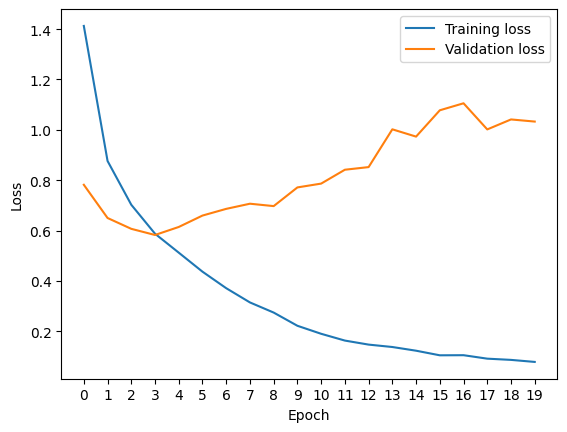

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

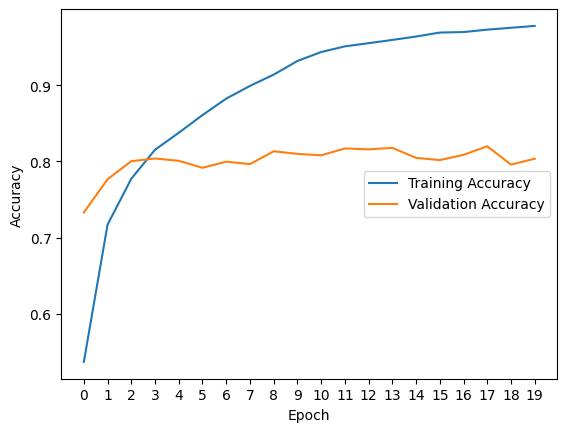

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='right')
plt.show()

In [ ]:
training_accuracies.append(history.history['accuracy'])
validation_accuracies.append(history.history['val_accuracy'])
training_loss.append(history.history['loss'])
validation_loss.append(history.history['val_loss'])

In [ ]:
print(matrix)

[[1087   96   98   24   26    0    0  135   62   29]
 [  28  991   26    0    0    0    0    4    0    0]
 [  39   36  861    2    3    0    0    1    2    0]
 [   2    0   10  127   23    0   43    3    0    0]
 [   7    0    6   44  778   39   45    0    0    1]
 [   0    0    0    0   13   80    0    0    0    0]
 [   2    0    1   20   18    0  315    0    0    0]
 [  38    0   11    0    1    0    0  413   41    0]
 [  32    0    1    0    0    0    0   80  275   20]
 [  22    0    4    2    9    0    0    2   46  149]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(0,10,1)))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1557
           1       0.88      0.94      0.91      1049
           2       0.85      0.91      0.88       944
           3       0.58      0.61      0.59       208
           4       0.89      0.85      0.87       920
           5       0.67      0.86      0.75        93
           6       0.78      0.88      0.83       356
           7       0.65      0.82      0.72       504
           8       0.65      0.67      0.66       408
           9       0.75      0.64      0.69       234

    accuracy                           0.81      6273
   macro avg       0.76      0.79      0.77      6273
weighted avg       0.82      0.81      0.81      6273



None


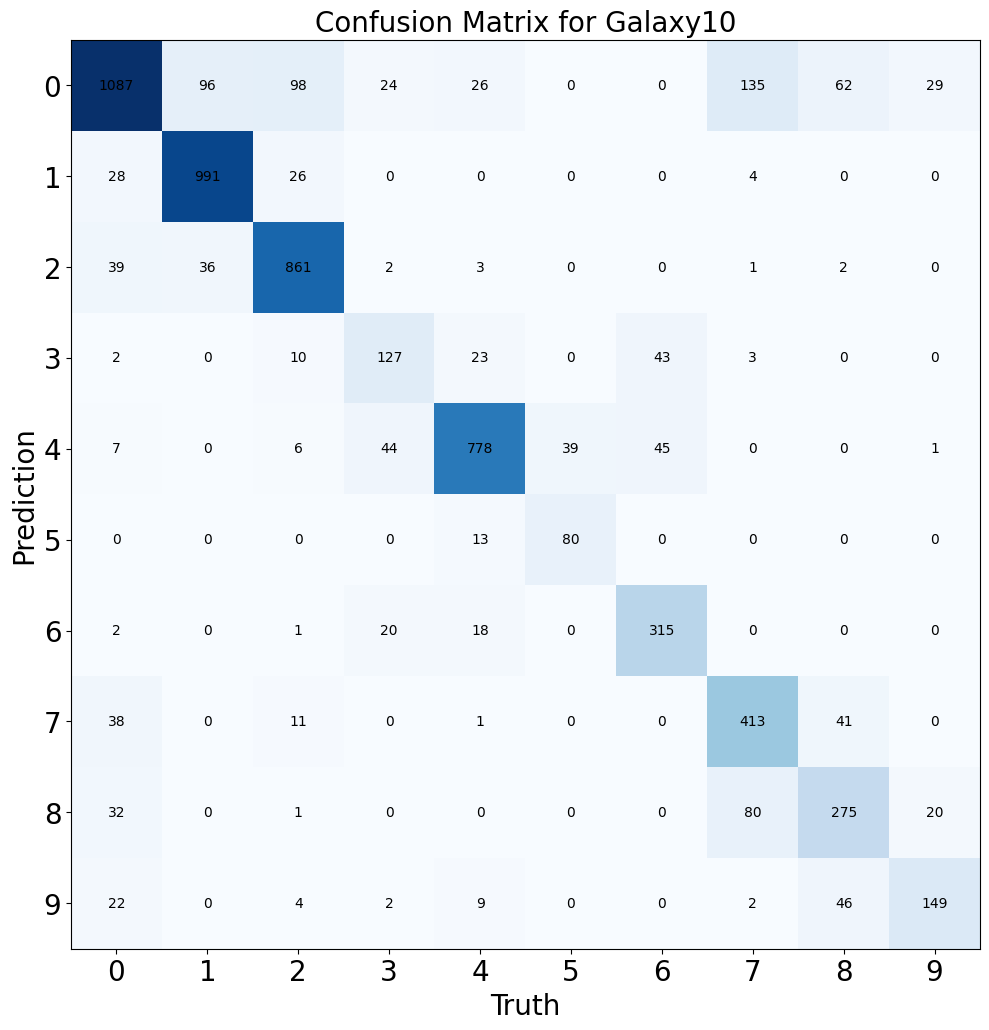

In [ ]:
print(galaxy10_confusion(matrix))

In [ ]:
print(matrix)


Line charts

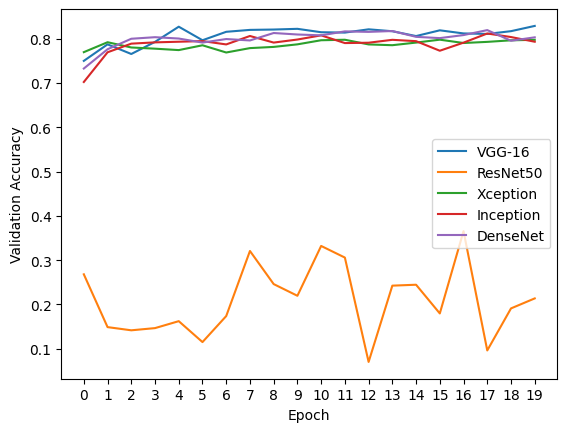

In [ ]:
# plt.figure(figsize=(8,10))

plt.plot(validation_accuracies[0])
plt.plot(validation_accuracies[1])
plt.plot(validation_accuracies[2])
plt.plot(validation_accuracies[3])
plt.plot(validation_accuracies[4])


plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Validation Accuracy')
plt.legend(['VGG-16', 'ResNet50', 'Xception', 'Inception', 'DenseNet'], loc='right')
plt.show()

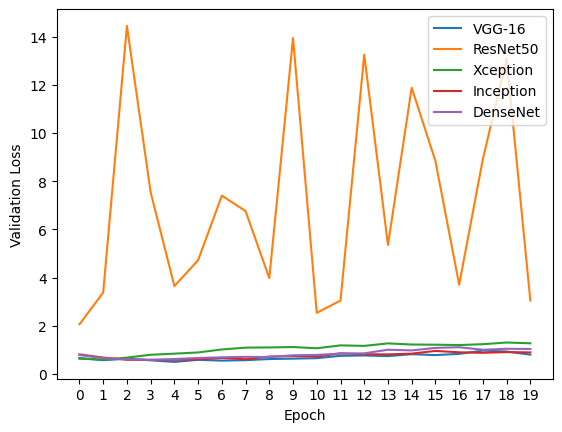

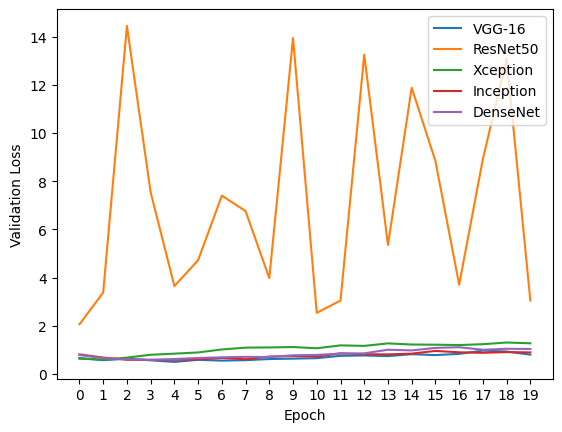

In [ ]:
plt.plot(validation_loss[0])
plt.plot(validation_loss[1])
plt.plot(validation_loss[2])
plt.plot(validation_loss[3])
plt.plot(validation_loss[4])
plt.xlabel('Epoch')
plt.xticks(range(0,20,1))
plt.ylabel('Validation Loss')
plt.legend(['VGG-16', 'ResNet50', 'Xception', 'Inception', 'DenseNet'], loc='upper right')
plt.show()